In [1]:
import pandas as pd
import time
from pyarrow import csv
# import datatable as dt
import dask.dataframe as dd
import timeit
import matplotlib.pyplot as plt

In [2]:
all_res = []
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = timeit.default_timer()
        result = func(*args, **kwargs)
        end_time = timeit.default_timer()
        execution_time = end_time - start_time
        print(f"Execution time of '{func.__name__}': {execution_time} seconds")
        all_res.append({'Function': func.__name__, 'Execution Time': execution_time})
        return result
    return wrapper

In [3]:
#PyArrow
@measure_time
def read_csv_pyarrow(file):
    try:
        # read_options = csv.ReadOptions(use_threads=True, block_size=2**30)  # Exemple de paramètres
        arrow_table = csv.read_csv(file)
        df = arrow_table.to_pandas()
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
    return df


In [4]:
@measure_time
def read_csv_dask(file):
    try:
        dask_dataframe = dd.read_csv(file)
        df = dask_dataframe.compute() 
    except Exception as e:
        print(f"An error occurred: {e}")
    return df

In [5]:
@measure_time
def read_csv_c(file):
    df = pd.read_csv(file,engine="c")
    return df

In [6]:
@measure_time
def read_csv(file):
    df = pd.read_csv(file)
    return df

In [7]:
file_to_read = 'creditcard_2023.csv'

df = read_csv(file_to_read)
df_c = read_csv_c(file_to_read)
arrow_df = read_csv_pyarrow(file_to_read)
dask_df = read_csv_dask(file_to_read)

Execution time of 'read_csv': 1.759405583004991 seconds
Execution time of 'read_csv_c': 1.8960142089999863 seconds
Execution time of 'read_csv_pyarrow': 0.32294954099779716 seconds
Execution time of 'read_csv_dask': 1.0135468750013388 seconds


In [8]:
functions = [result['Function'] for result in all_res]
execution_times = [result['Execution Time'] for result in all_res]


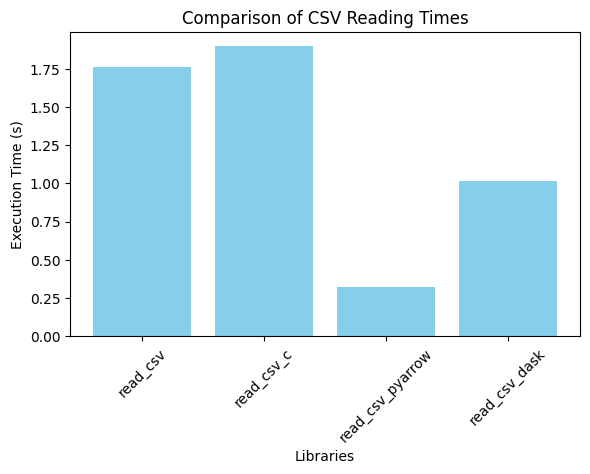

In [9]:
# Création du graphique à barres
plt.figure(figsize=(6, 4))
plt.bar(functions, execution_times, color='skyblue')

# Ajout des labels et titres
plt.xlabel('Libraries')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of CSV Reading Times')

# Affichage du graphique
plt.tight_layout()
plt.xticks(rotation=45)  # Rotation des labels pour la lisibilité
plt.show()